In [164]:
import warnings
import numpy as np
import pandas as pd
from sklearn import tree

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
df1 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/0100.xlsx")
df22 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/100200.xlsx")
df3 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/200300.xlsx")
df4 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/300400.xlsx")
df5 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/400500.xlsx")
df6= pd.read_excel(r"/Users/omavi/Desktop/uvo/files/500600.xlsx")
df7 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/600700.xlsx")
df8 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/700800.xlsx")
df9 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/800900.xlsx")
df10 = pd.read_excel(r"/Users/omavi/Desktop/uvo/files/9001000.xlsx")


In [166]:
pd.isnull(df10).sum()

genre         19510
id                0
name              0
popularity        0
dtype: int64

In [167]:
result = pd.concat([df1, df22, df3,df4,df5,df6, df7, df8,df9,df10], axis=0)
result.head(200)
result.shape

(677709, 5)

In [168]:
pd.isnull(result).sum()

genre           266076
id                   0
name             64161
popularity           0
Column1.name    613556
dtype: int64

In [169]:
len(result. columns) 

5

In [170]:
df = result.iloc[: , :-1]
df.shape
df.head()

,genre,id,name,popularity
0,"jawaiian,pacific islands pop",4Cy6TrPbVlo9OP1MTSONo9,Josh WaWa White,39
1,NaN,7vo7i6D53CDdJsMI6l1bkm,Jet Chamber,0
2,"instrumental bluegrass,progressive bluegrass",1Stj7mbbJFkKGqasheXUVF,Russ Barenberg,30
3,"album rock,classic canadian rock,classic rock,...",3TkWygOTDBZXAdFDh9HOkG,Chilliwack,37
4,"indiecoustica,pop folk",0mUIey7n1U90IScto35rX7,Dave Thomas Junior,44


In [171]:
# checking null value
pd.isnull(df).sum()

genre         266076
id                 0
name           64161
popularity         0
dtype: int64

we can see some empty fields in the genre and name field

In [172]:
#most popular artist by  genre
df.sort_values(by=['popularity'], ascending=False)[['name', 'genre']].head(20)


,name,genre
12675,Taylor Swift,pop
10325,Taylor Swift,pop
10175,Taylor Swift,pop
7992,Taylor Swift,pop
13878,Taylor Swift,pop
5559,Taylor Swift,pop
11661,NaN,pop
73802,Bad Bunny,"reggaeton,trap latino"
25922,Bad Bunny,"reggaeton,trap latino"
59166,Bad Bunny,"reggaeton,trap latino"


In [173]:
df_1=df.groupby('name')['popularity'].mean().sort_values(ascending=[False]).reset_index()
df2d=df_1.head(10)

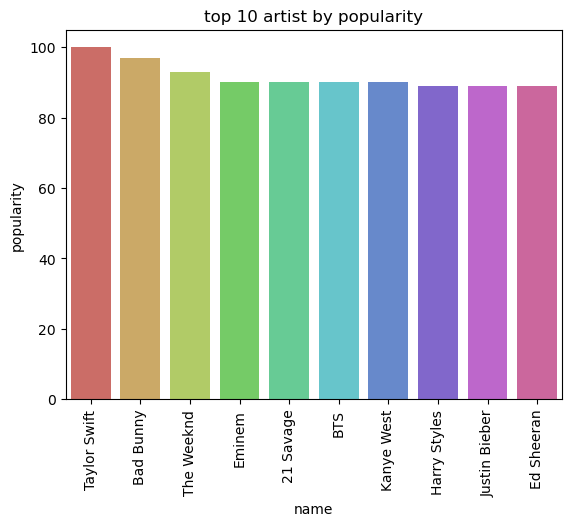

In [174]:
#top artist by popularity in a graph
sns.barplot(x = "name", y = "popularity", palette = 'hls', data = df2d).set(title='top 10 artist by popularity')
plt.xticks(rotation=90)
plt.show()


In [175]:
#most popular genre by artist
artists_popular = df.sort_values(by=['popularity'], ascending=False).reset_index()
artists_popular[:10]

,index,genre,id,name,popularity
0,12675,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
1,10325,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
2,10175,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
3,7992,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
4,13878,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
5,5559,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
6,11661,pop,06HL4z0CvFAxyc27GXpf02,NaN,100
7,73802,"reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,97
8,25922,"reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,97
9,59166,"reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,97


pop is the most popular genre with taylor swift being the most popular artist in pop by a margin

In [176]:
df[df["genre"]=='[]']
df_genre=df[df["genre"]!='[]']
df_genre.head()

,genre,id,name,popularity
0,"jawaiian,pacific islands pop",4Cy6TrPbVlo9OP1MTSONo9,Josh WaWa White,39
1,NaN,7vo7i6D53CDdJsMI6l1bkm,Jet Chamber,0
2,"instrumental bluegrass,progressive bluegrass",1Stj7mbbJFkKGqasheXUVF,Russ Barenberg,30
3,"album rock,classic canadian rock,classic rock,...",3TkWygOTDBZXAdFDh9HOkG,Chilliwack,37
4,"indiecoustica,pop folk",0mUIey7n1U90IScto35rX7,Dave Thomas Junior,44


In [177]:
df_sort_genres=pd.DataFrame(df_genre.assign(genre=df_genre.genre.str.split(",")).explode('genre'))
df_sort_genres.tail()

,genre,id,name,popularity
49428,zydeco,4I2LAvm6wV4SY7sp3qpdDH,Jimmy C. Newman,26
49429,brazilian rock,6tw6EpC9RgmSRZiZg0n22t,Legião Urbana,66
49429,mpb,6tw6EpC9RgmSRZiZg0n22t,Legião Urbana,66
49429,rock brasiliense,6tw6EpC9RgmSRZiZg0n22t,Legião Urbana,66
49429,rock nacional brasileiro,6tw6EpC9RgmSRZiZg0n22t,Legião Urbana,66


In [178]:
df_sort_genres['genre']=df_sort_genres.genre.str.replace('[',' ')
df_sort_genres['genre']=df_sort_genres.genre.str.replace(']',' ')

/var/folders/5j/8pqv5wp90nl5b8qrs90tv92w0000gn/T/ipykernel_24875/1629893304.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sort_genres['genre']=df_sort_genres.genre.str.replace('[',' ')
/var/folders/5j/8pqv5wp90nl5b8qrs90tv92w0000gn/T/ipykernel_24875/1629893304.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sort_genres['genre']=df_sort_genres.genre.str.replace(']',' ')


In [179]:
# get top 30 most commom genres
n = 30
top_30=pd.DataFrame(df_sort_genres['genre'].value_counts()[:n]).reset_index()
top_30.rename(columns = {'index':'Genre','genre':'Total_Count'}, inplace = True)
top_30

,Genre,Total_Count
0,rock,4594
1,country rock,3757
2,hip hop,3474
3,dance pop,3471
4,singer-songwriter,3240
5,electro house,3216
6,edm,3103
7,pop rock,2987
8,classic rock,2965
9,tropical,2963


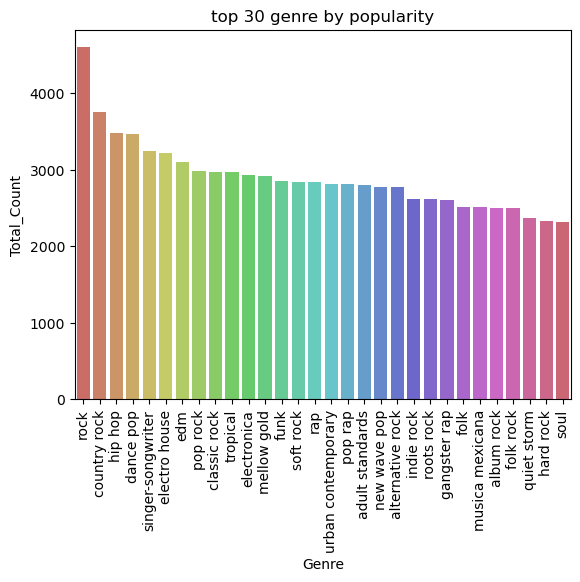

In [180]:
sns.barplot(x = "Genre", y = "Total_Count", palette = 'hls', data = top_30).set(title='top 30 genre by popularity')
plt.xticks(rotation=90)
plt.show()

In [193]:
#top 10 least popular genres
dfp =df.dropna()

dfp1=dfp.sort_values('popularity',ascending=[True]).head(10)
dfp1

,genre,id,name,popularity
15134,"arkansas indie,little rock indie",7d8bnIEY34C9Djf0W0D0Ka,Grand Serenade,0
4687,p funk,3ZNcUktF5hANNeGzi6Enlj,Space Cadets,0
15395,thai psychedelic,2kxQRjqiYflsYWxI982n7s,Sodsai Chaengkij,0
4674,orgcore,1JxNQj4lZoTPtmyawsQNUw,Higher Giant,0
15435,experimental black metal,0KdK2zZUiWtxeXtNNYRv2r,Seven Chains,0
4665,"nz indie,nz punk",4OUIgZOpE8UUZRZPVvamiz,The Drab Doo-Riffs,0
52935,viral trap,2wLntq4zymiMf6BLAAji8k,Silent but Deadly,0
4651,jazz fusion,4LN7Pf87nEe2wWqDiMrybY,John McLaughlin Trio,0
4632,new age,6LJoaSRD5iI1gUXIwPs6oE,Kevin Wood,0
52976,channel pop,3lFwU1CPyNSjSAuL3eyKdC,Michael Claudio,0


In [202]:
#√Top Ten Popular Songs with Popularity More Than 90% by artist
most_popular_over_90 = df.query('popularity>90',inplace =False).sort_values('popularity',ascending = False)
most_popular_over_90 

,genre,id,name,popularity
10175,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
5559,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
7992,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
13878,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
10325,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
12675,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
11661,pop,06HL4z0CvFAxyc27GXpf02,NaN,100
59166,"reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,97
25922,"reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,97
73802,"reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,97


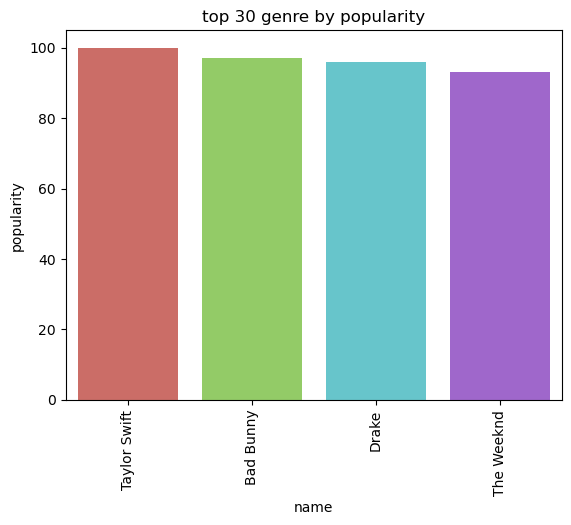

In [204]:
sns.barplot(x = "name", y = "popularity", palette = 'hls', data = most_popular_over_90).set(title='top 30 genre by popularity')
plt.xticks(rotation=90)
plt.show()

four artists have songs with a popularity of over 90